<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# TS3
#### Adrián Pablo Cafa

![Interrelations between analog, discrete and digital signals](analog_discrete_digital.png)

![Model of the quantization process](model_quantization.png)

### Bloque cuantizador:
s_Q = $\mathop{Q}_{B,V_F}  \{s_R\}$
### Paso de cuantización:
q = $\frac{2.V_F}{2^B - 1} \approx \frac{V_F}{2^{B-1}}$

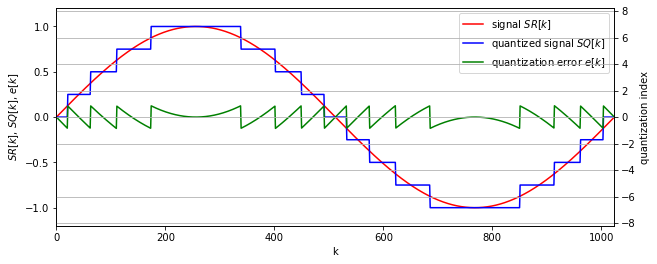

In [10]:
import numpy as np
import matplotlib.pyplot as plt


N = 1024  # longitud de la señal (kmaximo)

# generacion de la señal:
# amplitud normalizada a 1 Volt
Vmax=1 # (1Volt)

x = Vmax*np.sin(2*np.pi/N * np.arange(N))

# Analizo VF [Volts] y B [bits] (se debe modificar VF y B, con 16 bits se ve practicamente sin error)

# quantized signal
#B: ADC de B bits
B=4
levels = 2**B
# (+/-)VF: Rango del ADC

VF = 2
q = VF/(2**(B-1))

xi = np.round(x/q)
xQ = (q) * xi
e = xQ - x

# plot
fig, ax1 = plt.subplots(figsize=(10, 4))
# twinx() es para poner ambos ejes en la misma grafica
ax2 = ax1.twinx()

# Eje para representar las 3 señales indicadas:
ax1.plot(x, 'r', label=r'signal $SR[k]$')
ax1.plot(xQ, 'b', label=r'quantized signal $SQ[k]$')
ax1.plot(e, 'g', label=r'quantization error $e[k]$')

ax1.set_xlabel('k')
ax1.set_ylabel(r'$SR[k]$, $SQ[k]$, $e[k]$')
ax1.axis([0, N, -Vmax-0.2, Vmax+0.2])
ax1.legend()

# Eje que representa la cuantizacion:
ax2.set_ylim([-levels/2-0.2, levels/2+0.2])
ax2.set_ylabel('quantization index')
ax2.grid()

In [3]:
# ahora sumo ruido a la señal:

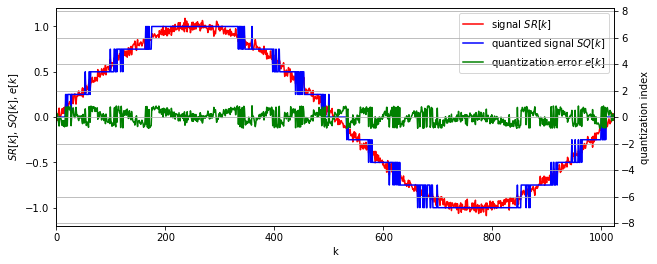

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x= Vmax*np.sin(2*np.pi/N * np.arange(N))
percentage = 0.05
n = np.random.normal(0, x.std(), x.size) * percentage
pn = x + n

# quantized signal
#B: ADC de B bits
B=4
levels = 2**B
# (+/-)VF: Rango del ADC

VF = 2
q = VF/(2**(B-1))

xi = np.round(pn/q)
xQ = (q) * xi
e = xQ - pn

# plot
fig, ax1 = plt.subplots(figsize=(10, 4))
# twinx() es para poner ambos ejes en la misma grafica
ax2 = ax1.twinx()

# Eje para representar las 3 señales indicadas:
ax1.plot(pn, 'r', label=r'signal $SR[k]$')
ax1.plot(xQ, 'b', label=r'quantized signal $SQ[k]$')
ax1.plot(e, 'g', label=r'quantization error $e[k]$')

ax1.set_xlabel('k')
ax1.set_ylabel(r'$SR[k]$, $SQ[k]$, $e[k]$')
ax1.axis([0, N, -Vmax-0.2, Vmax+0.2])
ax1.legend()

# Eje que representa la cuantizacion:
ax2.set_ylim([-levels/2-0.2, levels/2+0.2])
ax2.set_ylabel('quantization index')
ax2.grid()

In [5]:
bins= 10


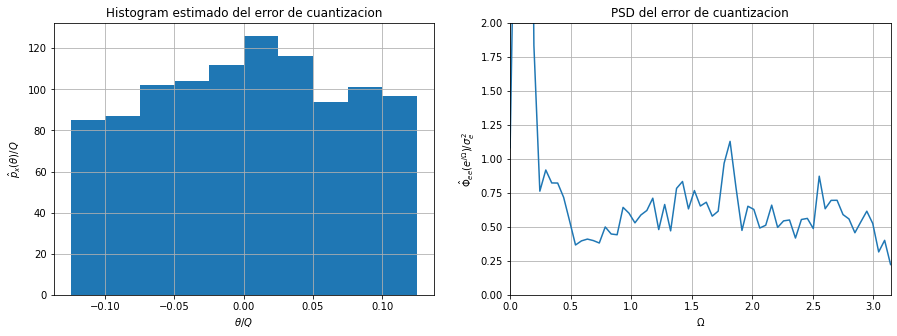

In [6]:
import scipy.signal as sig

def analisis_error(x, e):
    bins=10
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.hist(e,bins)
    plt.title('Histogram estimado del error de cuantizacion')
    plt.xlabel(r'$\theta / Q$')
    plt.ylabel(r'$\hat{p}_x(\theta) / Q$')
    plt.grid()
    
    # PSD de la señal de error:
    plt.subplot(122)
    nf, Pee = sig.welch(e, nperseg=128)
    plt.plot(nf*2*np.pi, Pee*6/Q**2)
    plt.title('PSD del error de cuantizacion')
    plt.xlabel(r'$\Omega$')
    plt.ylabel(r'$\hat{\Phi}_{ee}(e^{j \Omega}) / \sigma_e^2$')
    plt.axis([0, np.pi, 0, 2])
    plt.grid()


# quantization step
Q = q
x = np
# quantize signal
xQ = xQ
e = xQ - pn

analisis_error(x, e)



<ipython-input-7-92ecdeccc0bf>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


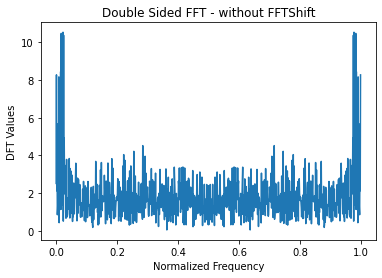

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

NFFT=1024 #NFFT-point DFT  
X=fft(e,NFFT) #compute DFT using FFT     

fig2, ax = plt.subplots(nrows=1, ncols=1) #create figure handle
   
nVals=np.arange(start = 0,stop = NFFT)/NFFT #Normalized DFT Sample points         
ax.plot(nVals,np.abs(X))     
ax.set_title('Double Sided FFT - without FFTShift')        
ax.set_xlabel('Normalized Frequency')
ax.set_ylabel('DFT Values')
fig2.show()

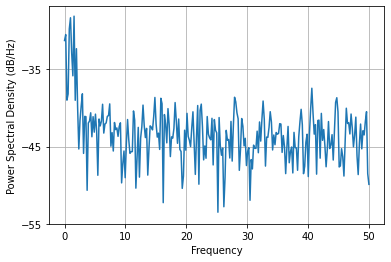

In [8]:
diff = diff = 0.01
plt.psd(e, 512, 1 / diff)
plt.show()
